In [1]:
import pandas as pd
import numpy as np

In [2]:
PATH="C:\\Users\\Lenovo\\Documents\\GitHub\\izenda-ml\\izenda-ml\\datasets\\restaurant-revenue-prediction-train_1.csv"

In [3]:
PATH1="C:\\Users\\Lenovo\\Documents\\GitHub\\izenda-ml\\izenda-ml\\datasets\\restaurant-revenue-prediction-test.csv"

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
train = pd.read_csv(PATH) 

In [6]:
test = pd.read_csv(PATH1)

In [7]:
combine = [train, test]

In [8]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['revenue'].values

In [10]:
all_data = pd.concat([train,test]).reset_index(drop=True)

c:\python3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [11]:
all_data

,City,City Group,Id,Open Date,P1,P10,P11,P12,P13,P14,...,P36,P37,P4,P5,P6,P7,P8,P9,Type,revenue
0,İstanbul,Big Cities,0,07/17/1999,4,5,3,5,5.000,1,...,3,4,4.000,2,2,5,4,5,IL,5653753.000
1,Ankara,Big Cities,1,02/14/2008,4,5,1,5,5.000,0,...,0,0,4.000,1,2,5,5,5,FC,6923131.000
2,Diyarbakır,Other,2,03/09/2013,2,5,2,5,5.000,0,...,0,0,5.000,2,3,5,5,5,IL,2055379.000
3,Tokat,Other,3,02/02/2012,6,10,8,10,7.500,6,...,12,6,6.000,4,4,10,8,10,IL,2675511.000
4,Gaziantep,Other,4,05/09/2009,3,5,2,5,5.000,2,...,3,3,4.000,2,2,5,5,5,IL,4316715.000
5,Ankara,Big Cities,5,02/12/2010,6,8,10,8,6.000,0,...,0,0,7.500,8,10,10,8,8,FC,5017319.000
6,İstanbul,Big Cities,6,10/11/2010,2,5,2,5,5.000,3,...,4,4,4.000,1,5,5,5,5,IL,5166635.000
7,İstanbul,Big Cities,7,06/21/2011,4,4,4,3,4.000,0,...,0,0,5.000,2,3,5,4,4,IL,4491607.000
8,Afyonkarahisar,Other,8,08/28/2010,1,5,1,5,5.000,1,...,4,5,4.000,1,2,1,5,5,IL,4952497.000
9,Edirne,Other,9,11/16/2011,6,10,2,10,7.500,0,...,0,0,7.500,6,4,10,10,10,IL,5444227.000


In [12]:
# original['City'].unique()

In [13]:
# original.head()

In [7]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import matplotlib.pyplot as plt


C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


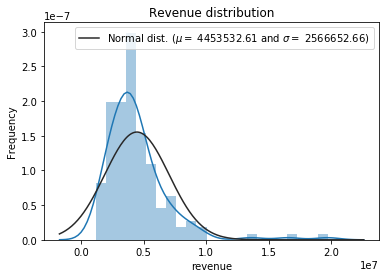

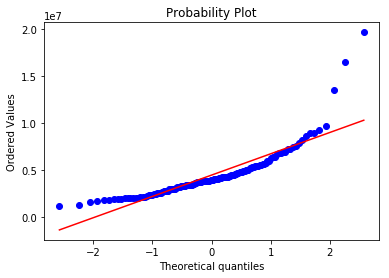

In [8]:
sns.distplot(original['revenue'],fit=norm)
(mu, sigma) = norm.fit(original['revenue'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Revenue distribution')
fig = plt.figure()
result = stats.probplot(original['revenue'],plot=plt)
plt.show()

In [14]:
def get_string_cols(df):    
    string_cols = list(df.select_dtypes(include=['object','category']).columns)
    return string_cols

def get_num_cols(df):    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    num_cols = list(df.select_dtypes(include=numerics).columns)    
    return num_cols

In [15]:
def pre_process(df,label_col):
    
    try:
        y = df[label_col]
    except Exception as e:
        print("The {} column in not present in the given csv. \nExiting the script...".format(label_col))
        flush_memory()
        
    print("Pre-Processing the data...")
    
    df = df.drop(label_col,axis=1)
    string_cols = get_string_cols(df)
    num_cols = get_num_cols(df)
    substring = ':string'
    num_cat_cols = []
    for string in num_cols:
        if(substring in string):
            num_cat_cols.append(string)
    for col in num_cat_cols:
        df[col] = df[col].astype('object')
    categorical_cols = string_cols + num_cat_cols
    print('Size of df before making dummies: ', df.memory_usage(deep=True).sum()/1024/1024, 'mb') 
    print('Converting categorical columns to dummies...') 
    df = pd.get_dummies(df,columns=categorical_cols,sparse=True)
    print('Size of df after making dummies: ', df.memory_usage(deep=True).sum()/1024/1024, 'mb')
    global training_dummy_columns
    training_dummy_columns = df.columns
    df.columns = df.columns.str.replace(':string','')
    df[label_col] = y  
    return df

In [12]:
# original.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.000,4.000,4.000,2,...,3.000,5,3,4,5,5,4,3,4,5653753.000
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.000,4.000,4.000,1,...,3.000,0,0,0,0,0,0,0,0,6923131.000
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.000,2.000,5.000,2,...,3.000,0,0,0,0,0,0,0,0,2055379.000
3,3,02/02/2012,Tokat,Other,IL,6,4.500,6.000,6.000,4,...,7.500,25,12,10,6,18,12,12,6,2675511.000
4,4,05/09/2009,Gaziantep,Other,IL,3,4.000,3.000,4.000,2,...,3.000,5,1,3,2,3,4,3,3,4316715.000


In [18]:
# original['Open Date'].dtype

dtype('O')

In [24]:
# original['year'] = pd.DatetimeIndex(original['Open Date']).year  
# original['month'] = pd.DatetimeIndex(original['Open Date']).month
# original['day'] = pd.DatetimeIndex(original['Open Date']).day


In [25]:
# original.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P32,P33,P34,P35,P36,P37,revenue,year,month,day
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.000,4.000,4.000,2,...,4,5,5,4,3,4,5653753.000,1999,7,17
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.000,4.000,4.000,1,...,0,0,0,0,0,0,6923131.000,2008,2,14
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.000,2.000,5.000,2,...,0,0,0,0,0,0,2055379.000,2013,3,9
3,3,02/02/2012,Tokat,Other,IL,6,4.500,6.000,6.000,4,...,10,6,18,12,12,6,2675511.000,2012,2,2
4,4,05/09/2009,Gaziantep,Other,IL,3,4.000,3.000,4.000,2,...,3,2,3,4,3,3,4316715.000,2009,5,9


In [16]:
all_data['open_date_formatted']= pd.to_datetime(all_data['Open Date'].astype(str), errors='coerce')

In [17]:
all_data['diff'] = (np.datetime64('today') - all_data['open_date_formatted']).dt.days


In [20]:
all_data.drop(['Open Date','City','open_date_formatted'], axis=1, inplace=True)

In [21]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [36]:
# train

In [37]:
# test

In [38]:
# test.drop('revenue',axis=1)

In [25]:
# original['diff'] = (np.datetime64('today') - original['open_date_formatted']).dt.days


In [26]:
# original.assign(Date=pd.to_datetime(original[['year', 'month' , 'day']]))

In [70]:
original.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue', 'year', 'month', 'day', 'open_date_formatted',
       'diff'],
      dtype='object')

In [78]:
original.to_csv('restaurant-revenue-prediction-train-manual.csv')

In [27]:
df = pre_process(train,'revenue')

Pre-Processing the data...
Size of df before making dummies:  0.057021141052246094 mb
Converting categorical columns to dummies...
Size of df after making dummies:  0.04110145568847656 mb


In [28]:
df.dtypes

Id                         int64
P1                         int64
P10                        int64
P11                        int64
P12                        int64
P13                      float64
P14                        int64
P15                        int64
P16                        int64
P17                        int64
P18                        int64
P19                        int64
P2                       float64
P20                        int64
P21                        int64
P22                        int64
P23                        int64
P24                        int64
P25                        int64
P26                      float64
P27                      float64
P28                      float64
P29                      float64
P3                       float64
P30                        int64
P31                        int64
P32                        int64
P33                        int64
P34                        int64
P35                        int64
P36       

In [39]:
df = df[df["revenue"] < 16000000]

In [40]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [42]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [43]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)



In [44]:

xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [45]:
from sklearn.metrics import explained_variance_score


In [46]:
predictions = xg_reg.predict(X_test)
print(explained_variance_score(predictions,y_test))

-7.073222895686154


In [47]:
predictions

array([2717692.2, 3341127. , 2612424.8, 2741051.2, 2343782.5, 2690359.5,
       2316856.5, 3636045.5, 2819371.8, 2836875. , 1347078.6, 2927771.8,
       1325807.2, 2901627.5, 2561070. , 1325807.2, 2206869.2, 1620766.4,
       3119177.5, 1594824.5, 3266383. , 2638000.5, 2832800.5, 2638000.5,
       2978083.2, 2826277.5, 2852221. ], dtype=float32)

In [49]:
# X_test

In [52]:
def pre_process_test(df):
    
    print("Pre-Processing the data...")
    
    string_cols = get_string_cols(df)
    num_cols = get_num_cols(df)
    substring = ':string'
    num_cat_cols = []
    for string in num_cols:
        if(substring in string):
            num_cat_cols.append(string)
    for col in num_cat_cols:
        df[col] = df[col].astype('object')
    categorical_cols = string_cols + num_cat_cols
    print('Size of df before making dummies: ', df.memory_usage(deep=True).sum()/1024/1024, 'mb') 
    print('Converting categorical columns to dummies...') 
    df = pd.get_dummies(df,columns=categorical_cols,sparse=True)
    print('Size of df after making dummies: ', df.memory_usage(deep=True).sum()/1024/1024, 'mb')
    global training_dummy_columns
    training_dummy_columns = df.columns
    df.columns = df.columns.str.replace(':string','')  
    return df

In [53]:
df_test=pre_process_test(test)

Pre-Processing the data...
Size of df before making dummies:  42.29206466674805 mb
Converting categorical columns to dummies...
Size of df after making dummies:  30.708393096923828 mb


In [58]:
X_train.describe()

,Id,P1,P10,P11,P12,P13,P14,P15,P16,P17,...,P6,P7,P8,P9,diff,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
count,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,...,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000
mean,69.593,4.019,5.546,3.222,5.343,5.111,1.574,1.500,2.130,1.130,...,3.389,5.463,5.222,5.491,3593.815,0.556,0.444,0.009,0.528,0.463
std,38.270,2.894,1.906,1.921,2.029,1.073,2.949,2.549,3.762,2.188,...,2.064,2.310,1.925,1.936,1501.953,0.499,0.499,0.096,0.502,0.501
min,1.000,1.000,4.000,1.000,2.000,3.000,0.000,0.000,0.000,0.000,...,1.000,1.000,1.000,4.000,1874.000,0.000,0.000,0.000,0.000,0.000
25%,39.750,2.000,5.000,2.000,4.000,5.000,0.000,0.000,0.000,0.000,...,2.000,5.000,4.000,4.000,2601.250,0.000,0.000,0.000,0.000,0.000
50%,68.500,3.000,5.000,3.000,5.000,5.000,0.000,0.000,0.000,0.000,...,3.000,5.000,5.000,5.000,3273.500,1.000,0.000,0.000,1.000,0.000
75%,100.750,4.000,5.000,4.000,5.000,5.000,3.000,2.000,3.000,1.250,...,4.000,5.000,5.000,5.000,4045.000,1.000,1.000,0.000,1.000,1.000
max,136.000,12.000,10.000,10.000,10.000,7.500,15.000,10.000,15.000,15.000,...,10.000,10.000,10.000,10.000,8323.000,1.000,1.000,1.000,1.000,1.000


In [57]:
df_test.describe()

,Id,P1,P10,P11,P12,P13,P14,P15,P16,P17,...,P8,P9,revenue,diff,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL,Type_MB
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,...,100000.000,100000.000,0.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,49999.500,4.088,5.459,3.312,5.061,5.087,1.280,1.306,1.747,1.157,...,4.931,5.251,nan,3796.843,0.493,0.507,0.022,0.570,0.404,0.003
std,28867.658,2.813,1.764,2.068,1.765,0.979,2.497,2.167,3.172,2.433,...,1.718,1.703,nan,1749.439,0.500,0.500,0.148,0.495,0.491,0.054
min,0.000,1.000,4.000,1.000,2.000,3.000,0.000,0.000,0.000,0.000,...,1.000,4.000,nan,1873.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,24999.750,2.000,5.000,2.000,4.000,5.000,0.000,0.000,0.000,0.000,...,4.000,4.000,nan,2513.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,49999.500,3.000,5.000,3.000,5.000,5.000,0.000,0.000,0.000,0.000,...,5.000,5.000,nan,3281.000,0.000,1.000,0.000,1.000,0.000,0.000
75%,74999.250,4.000,5.000,4.000,5.000,5.000,2.000,2.000,3.000,2.000,...,5.000,5.000,nan,4358.000,1.000,1.000,0.000,1.000,1.000,0.000
max,99999.000,15.000,10.000,10.000,10.000,7.500,15.000,10.000,15.000,15.000,...,10.000,10.000,nan,8689.000,1.000,1.000,1.000,1.000,1.000,1.000


In [61]:
df_test.drop(['Type_MB','revenue'],axis=1,inplace=True)

In [66]:
predictions1 = xg_reg.predict(df_test)

In [67]:
predictions1

array([2270448.8, 2253442. , 2281131. , ..., 2682396.8, 3086487.5,
       2455179.8], dtype=float32)

In [69]:
pd.DataFrame(predictions1).to_csv("file.csv")

In [65]:
import math
print("RMSE: %.2f"
      % math.sqrt(np.mean((xg_reg.predict(X_test) - y_test) ** 2)))

RMSE: 2614319.97
